In [1]:
cnfl=[true]
include("PVCR.jl");

┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1186
┌ Warning: Module Conda with build ID 38462504167046 is missing from the cache.
│ This may mean Conda [8f4d0f93-b110-5947-807f-2305c1781a2d] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:947
┌ Warning: Module Conda with build ID 38462504167046 is missing from the cache.
│ This may mean Conda [8f4d0f93-b110-5947-807f-2305c1781a2d] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:947
┌ Info: Precompiling PyCall [438e738f-606a-5dbb-bf0a-cddfbfd45ab0]
└ @ Base loading.jl:1186
┌ Warning: Module Conda with build ID 38462504167046 is missing from the cache.
│ This may mean Conda [8f4d0f93-b110-5947-807f-2305c1781a2d] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:947
┌ Warning: `@pyimport foo` is deprecated in favor of `foo = pyimport("foo")`.
│   caller = _pywrap_pyimport(

# Residential cases

## Residential Case 1: Small PV System, this doesn't generate any injection into the grid

In [2]:
PVRes.capacity = 0.0
base_ebalance = annual_energy_balance(cnfl_residential, PVRes, print_output=false);
PVRes.capacity = 1.0
ts=simulate(cnfl_residential, PVRes, 3);

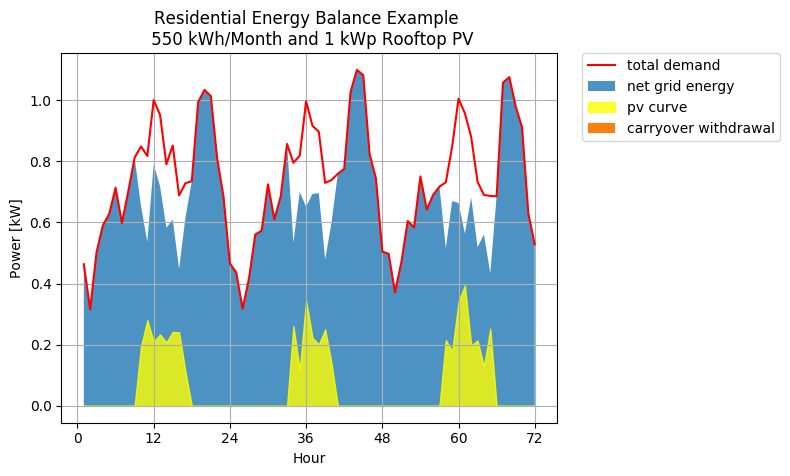

In [3]:
hours = 1:72
fill_between(hours, ts["injection_grid_h"], label = "net grid energy", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "pv curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "carryover withdrawal")
plot(hours, ts["demand_curve"], label = "total demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);
title("Residential Energy Balance Example \n 550 kWh/Month and 1 kWp Rooftop PV");

### Energy Balance for case residential 1

In [4]:
ebalance = annual_energy_balance(cnfl_residential, PVRes, print_output=true);

month consumer_energy PV_energy injection_grid grid_energy global_allowance allowance withdrawn_energy utility_supplied_energy carryover peak_power peak_demand
1 545.84 46.63 0.0 499.21 22.85 0.0 0.0 499.21 0.0 1.19 1.19
2 545.41 48.6 0.0 496.82 46.66 0.0 0.0 496.82 0.0 1.31 1.31
3 553.57 39.35 0.0 514.22 65.95 0.0 0.0 514.22 0.0 1.19 1.19
4 540.57 45.22 0.0 495.35 88.11 0.0 0.0 495.35 0.0 1.21 1.21
5 553.89 55.29 0.0 498.6 115.2 0.0 0.0 498.6 0.0 1.21 1.21
6 555.82 44.76 0.0 511.06 137.13 0.0 0.0 511.06 0.0 1.24 1.24
7 538.6 46.83 0.0 491.77 160.07 0.0 0.0 491.77 0.0 1.16 1.16
8 547.16 37.57 0.0 509.59 178.48 0.0 0.0 509.59 0.0 1.19 1.19
9 536.94 50.65 0.0 486.29 203.3 0.0 0.0 486.29 0.0 1.19 1.19
10 559.76 52.74 0.0 507.02 229.14 0.0 0.0 507.02 0.0 1.21 1.21
11 557.76 34.46 0.0 523.3 246.03 0.0 0.0 523.3 0.0 1.24 1.24
12 558.25 61.79 0.0 496.46 276.31 0.0 0.0 496.46 0.0 1.21 1.21


### Billings case residential 1

In [5]:
bills_residential = Dict();  base_bills_residential = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "demand_charge", " ", "total_cost", " | ", "counterfactual_cost", " ", "savings")
for m in 1:12
    bills_residential[m] = monthly_bill(ebalance[m], cnfl_residential, print_output=true)
    base_bills_residential[m] = monthly_bill(base_ebalance[m], cnfl_residential, print_output=false)
end

grid_cost withdrawn_energy_cost demand_charge total_cost | counterfactual_cost savings
61635.45 0.0 0.0 72478.88  | 78001.33 5522.44
61396.07 0.0 0.0 72195.82  | 77950.66 5754.84
63138.81 0.0 0.0 74256.69  | 78916.91 4660.22
61248.87 0.0 0.0 72021.74  | 77377.26 5355.52
61575.18 0.0 0.0 72407.62  | 78954.65 6547.02
62822.71 0.0 0.0 73882.88  | 79183.03 5300.15
60891.0 0.0 0.0 71598.54  | 77143.6 5545.06
62675.48 0.0 0.0 73708.78  | 78157.75 4448.97
60341.78 0.0 0.0 70949.06  | 76947.47 5998.41
62418.44 0.0 0.0 73404.82  | 79650.26 6245.45
64048.3 0.0 0.0 75332.21  | 79412.85 4080.64
61360.55 0.0 0.0 72153.81  | 79471.18 7317.37


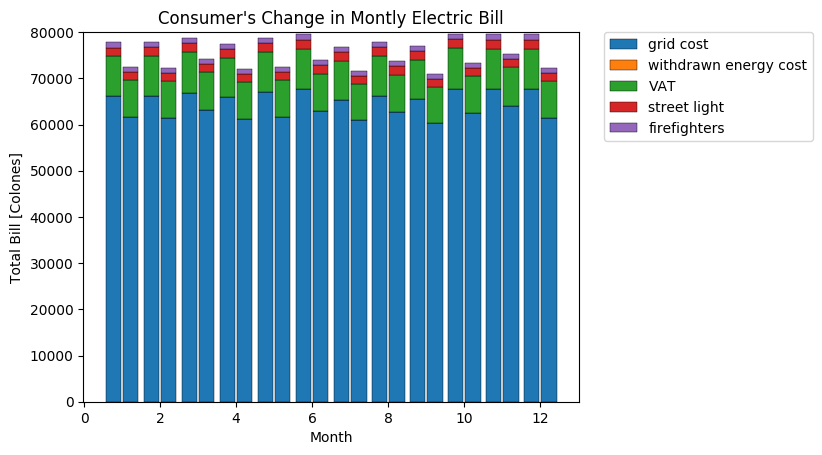

In [6]:
plot_bill(base_bills_residential, bills_residential, ["grid_cost", "withdrawn_energy_cost", "VAT", "street_light", "firefighters"]);

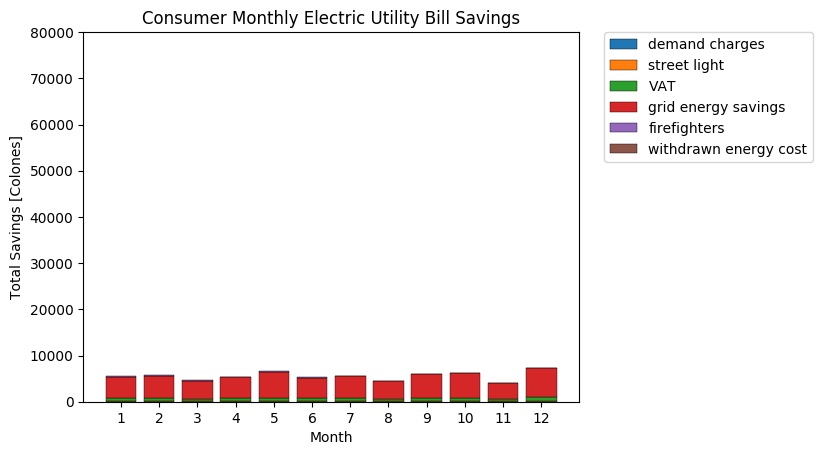

In [7]:
plot_savings(bills_residential);

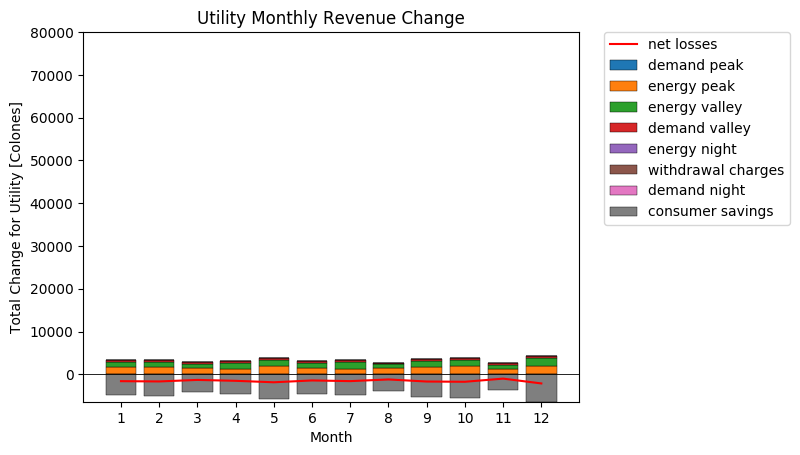

In [8]:
plot_utility_change(bills_residential);

## Residential Case 2: Medium Size PV System, produces some injection into the grid 

In [9]:
PVRes.capacity = 2.0
ts=simulate(cnfl_residential, PVRes, 3);

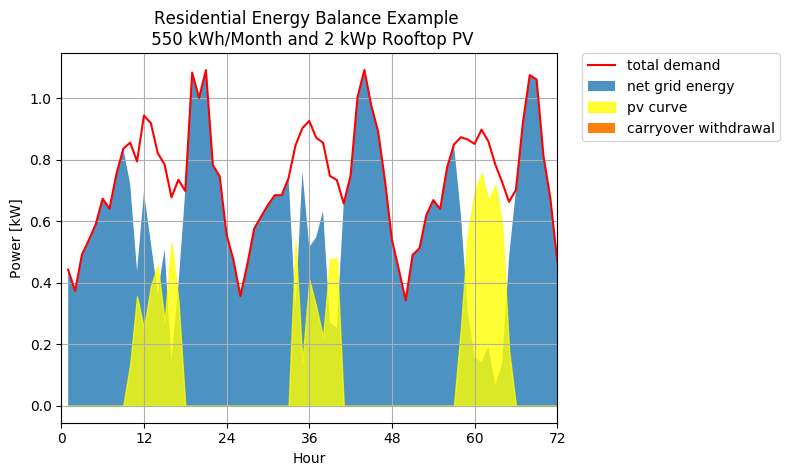

In [10]:
hours = 1:72
fill_between(hours, ts["injection_grid_h"], label = "net grid energy", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "pv curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "carryover withdrawal")
plot(hours, ts["demand_curve"], label = "total demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
xlim(1,72)
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);
title("Residential Energy Balance Example \n 550 kWh/Month and 2 kWp Rooftop PV");

### Energy Balance for case residential 2

In [11]:
ebalance = annual_energy_balance(cnfl_residential, PVRes, print_output=true);

month consumer_energy PV_energy injection_grid grid_energy global_allowance allowance withdrawn_energy utility_supplied_energy carryover peak_power peak_demand
1 545.69 58.47 0.0 487.22 28.65 0.0 0.0 487.22 0.0 1.18 1.18
2 547.61 60.35 0.0 487.26 58.22 0.0 0.0 487.26 0.0 1.29 1.29
3 552.5 74.36 0.0 478.14 94.66 0.0 0.0 478.14 0.0 1.19 1.19
4 539.52 86.79 0.0 452.73 137.19 0.0 0.0 452.73 0.0 1.19 1.19
5 553.31 88.35 0.0 464.96 180.48 0.0 0.0 464.96 0.0 1.2 1.2
6 555.09 88.94 0.0 466.14 224.06 0.0 0.0 466.14 0.0 1.21 1.21
7 537.38 84.36 0.0 453.02 265.4 0.0 0.0 453.02 0.0 1.17 1.17
8 546.17 71.3 0.0 474.87 300.34 0.0 0.0 474.87 0.0 1.19 1.19
9 536.84 99.82 0.0 437.01 349.25 0.0 0.0 437.01 0.0 1.21 1.21
10 558.15 89.47 0.0 468.67 393.09 0.0 0.0 468.67 0.0 1.21 1.21
11 558.41 96.15 0.0 462.26 440.2 0.0 0.0 462.26 0.0 1.25 1.25
12 559.55 88.88 0.0 470.66 483.76 0.0 0.0 470.66 0.0 1.21 1.21


### Billings case residential 2

In [12]:
bills_residential = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "demand_charge", " ", "total_cost", " | ", "counterfactual_cost", " ", "savings")
for m in 1:12
    bills_residential[m] = monthly_bill(ebalance[m], cnfl_residential, print_output=true)
end

grid_cost withdrawn_energy_cost demand_charge total_cost | counterfactual_cost savings
60435.58 0.0 0.0 71059.98  | 77984.17 6924.18
60438.95 0.0 0.0 71063.97  | 78210.69 7146.72
59525.58 0.0 0.0 69983.86  | 78790.09 8806.23
56981.37 0.0 0.0 66975.2  | 77253.09 10277.89
58206.11 0.0 0.0 68423.52  | 78886.22 10462.7
58324.36 0.0 0.0 68563.36  | 79096.22 10532.86
57010.69 0.0 0.0 67009.87  | 76999.63 9989.76
59198.68 0.0 0.0 69597.29  | 78040.73 8443.44
55407.52 0.0 0.0 65114.04  | 76935.24 11821.2
58578.1 0.0 0.0 68863.42  | 79458.66 10595.24
57935.98 0.0 0.0 68104.08  | 79490.26 11386.17
58777.37 0.0 0.0 69099.06  | 79624.6 10525.54


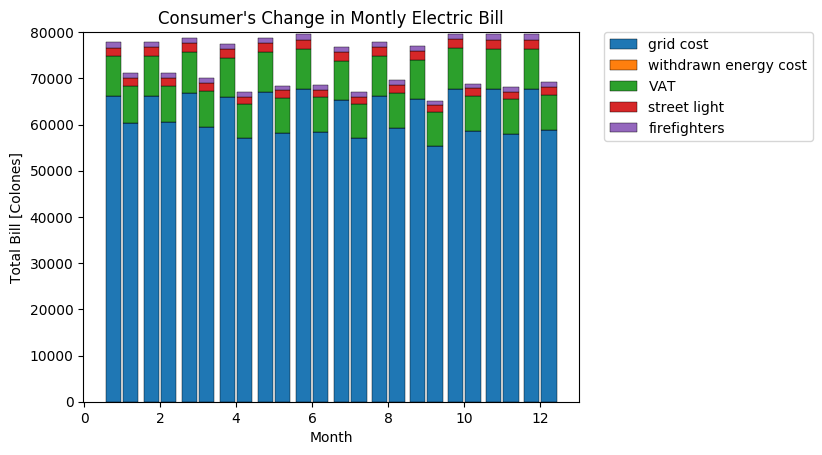

In [13]:
plot_bill(base_bills_residential, bills_residential, ["grid_cost", "withdrawn_energy_cost", "VAT", "street_light", "firefighters"]);

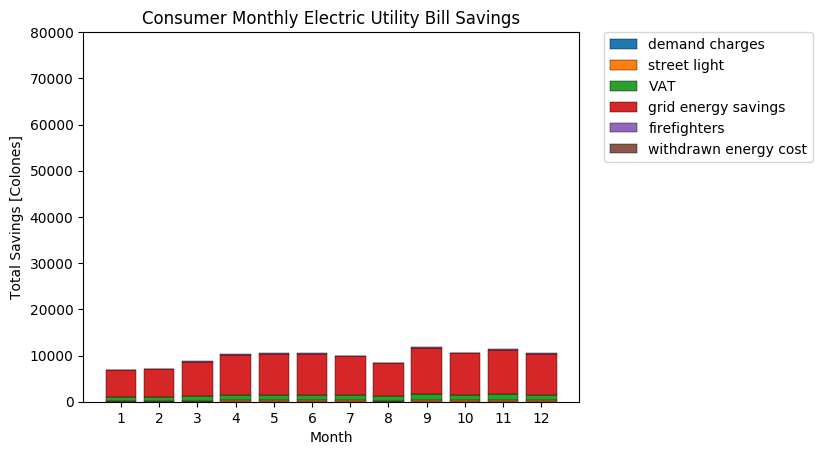

In [14]:
plot_savings(bills_residential);

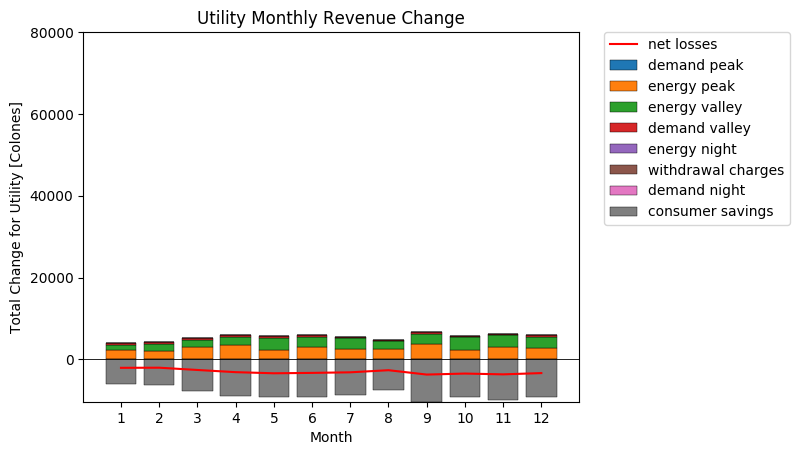

In [15]:
plot_utility_change(bills_residential);

## Residential Case 3: Large PV System that generates multi-day carry over

In [16]:
PVRes.capacity = 4.0
ts=simulate(cnfl_residential, PVRes, 3);

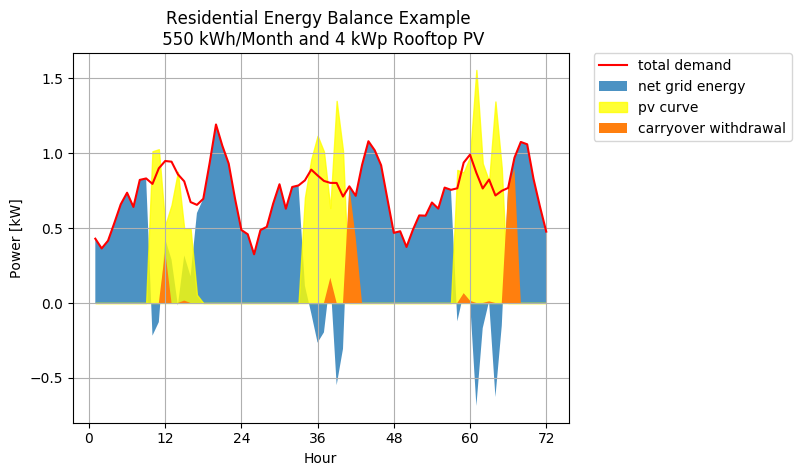

In [17]:
hours = 1:72
fill_between(hours, ts["injection_grid_h"], label = "net grid energy", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "pv curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "carryover withdrawal")
plot(hours, ts["demand_curve"], label = "total demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);
title("Residential Energy Balance Example \n 550 kWh/Month and 4 kWp Rooftop PV");

### Energy Balance for case residential 3

In [18]:
ebalance = annual_energy_balance(cnfl_residential, PVRes, print_output=true);

month consumer_energy PV_energy injection_grid grid_energy global_allowance allowance withdrawn_energy utility_supplied_energy carryover peak_power peak_demand
1 546.58 197.5 45.06 394.14 96.77 45.06 45.06 349.08 0.0 1.18 1.18
2 545.92 129.84 10.25 426.33 115.33 10.25 10.25 416.08 0.0 1.3 1.3
3 554.93 188.66 26.51 392.78 197.52 26.51 26.51 366.27 0.0 1.2 1.2
4 540.77 214.16 38.12 364.73 275.95 38.12 38.12 326.61 0.0 1.21 1.21
5 554.77 168.83 20.26 406.2 320.56 20.26 20.26 385.94 0.0 1.21 1.21
6 559.05 192.35 35.83 402.53 394.56 35.83 35.83 366.7 0.0 1.23 1.23
7 539.19 190.14 37.06 386.12 451.89 37.06 37.06 349.06 0.0 1.16 1.16
8 547.52 164.32 20.37 403.57 495.35 20.37 20.37 383.2 0.0 1.19 1.19
9 539.49 191.41 29.79 377.87 568.77 29.79 29.79 348.08 0.0 1.2 1.2
10 557.92 249.25 72.53 381.19 661.11 72.53 72.53 308.66 0.0 1.21 1.21
11 558.46 212.44 45.73 391.75 692.67 45.73 45.73 346.02 0.0 1.25 1.25
12 559.94 225.12 50.55 385.37 757.25 50.55 50.55 334.82 0.0 1.2 1.2


### Billings case residential 3

In [19]:
bills_residential = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "demand_charge", " ", "total_cost", " | ", "counterfactual_cost", " ", "savings")
for m in 1:12
    bills_residential[m] = monthly_bill(ebalance[m], cnfl_residential, print_output=true)
end

grid_cost withdrawn_energy_cost demand_charge total_cost | counterfactual_cost savings
46601.8 947.69 0.0 55946.49  | 78088.51 22142.02
53311.3 215.61 0.0 62918.56  | 78010.94 15092.38
48322.83 557.49 0.0 57468.81  | 79077.71 21608.89
44351.63 801.59 0.0 53093.52  | 77401.07 24307.56
50293.32 426.04 0.0 59626.23  | 79058.74 19432.51
48366.26 753.59 0.0 57777.91  | 79565.81 21787.9
46599.48 779.39 0.0 55722.53  | 77214.31 21491.78
50018.6 428.35 0.0 59304.4  | 78200.48 18896.09
46501.93 626.52 0.0 55406.24  | 77249.62 21843.39
42554.48 1525.33 0.0 51919.56  | 79431.38 27511.82
46295.22 961.74 0.0 55602.4  | 79495.25 23892.85
45173.74 1063.11 0.0 54409.44  | 79671.21 25261.77


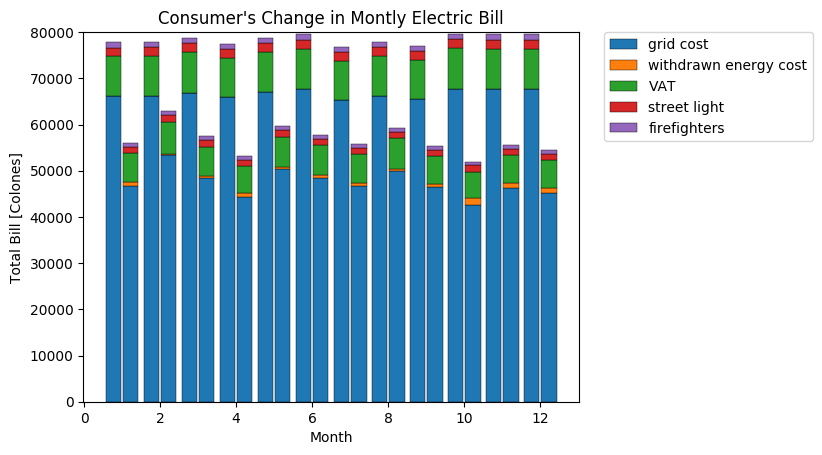

In [20]:
plot_bill(base_bills_residential, bills_residential, ["grid_cost", "withdrawn_energy_cost", "VAT", "street_light", "firefighters"]);

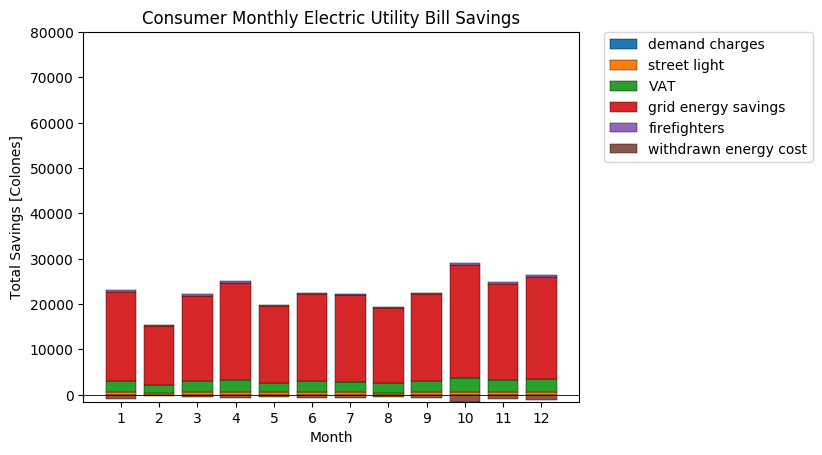

In [21]:
plot_savings(bills_residential);

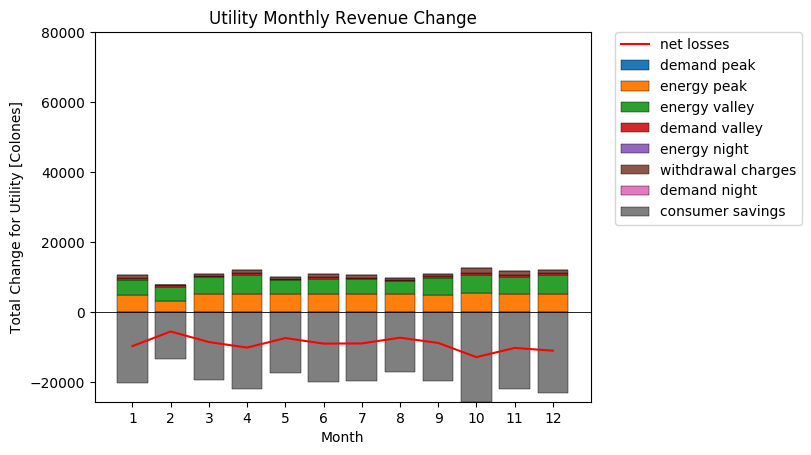

In [22]:
plot_utility_change(bills_residential);

# Commercial consumer subject to commercial and small size industrial tariff cases

## Commercial case1: small PV system

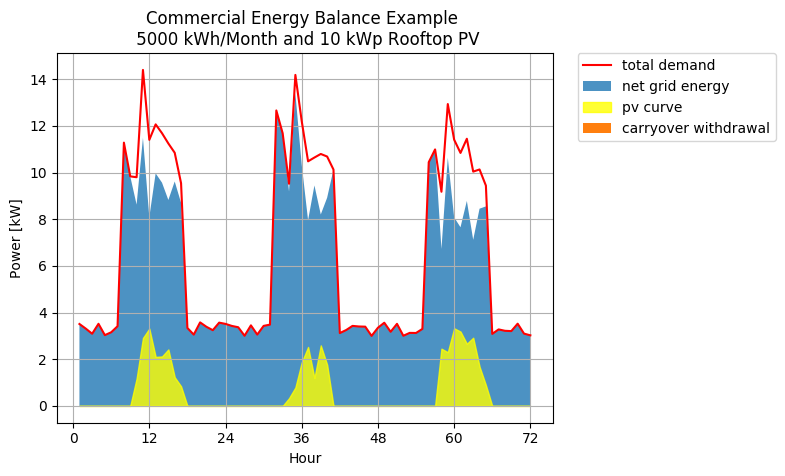

PyObject Text(0.5, 1, 'Commercial Energy Balance Example \n 5000 kWh/Month and 10 kWp Rooftop PV')

In [23]:
PVComInd.capacity = 0.0
base_ebalance = annual_energy_balance(cnfl_commercial, PVComInd, print_output=false);
PVComInd.capacity = 10.0
ts=simulate(cnfl_commercial, PVComInd, 3);
fill_between(hours, ts["injection_grid_h"], label = "net grid energy", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "pv curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "carryover withdrawal")
plot(hours, ts["demand_curve"], label = "total demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);
title("Commercial Energy Balance Example \n 5000 kWh/Month and 10 kWp Rooftop PV")

In [24]:
ebalance = annual_energy_balance(cnfl_commercial, PVComInd, print_output=true);

month consumer_energy PV_energy injection_grid grid_energy global_allowance allowance withdrawn_energy utility_supplied_energy carryover peak_power peak_demand
1 5014.26 299.25 0.0 4715.01 146.63 0.0 0.0 4715.01 0.0 14.9 13.4
2 5098.06 371.49 0.0 4726.57 328.66 0.0 0.0 4726.57 0.0 16.87 14.8
3 4846.76 441.15 0.0 4405.6 544.83 0.0 0.0 4405.6 0.0 14.5 12.59
4 5037.05 463.2 0.0 4573.85 771.8 0.0 0.0 4573.85 0.0 15.41 13.49
5 5339.44 486.28 0.0 4853.16 1010.07 0.0 0.0 4853.16 0.0 15.94 13.76
6 5200.94 420.25 0.0 4780.7 1216.0 0.0 0.0 4780.7 0.0 16.01 13.98
7 4966.31 460.38 0.0 4505.94 1441.58 0.0 0.0 4505.94 0.0 14.81 12.96
8 4997.69 379.33 0.0 4618.35 1627.45 0.0 0.0 4618.35 0.0 14.55 13.05
9 4905.56 468.07 0.0 4437.49 1856.81 0.0 0.0 4437.49 0.0 15.03 13.28
10 4734.95 428.67 0.0 4306.27 2066.86 0.0 0.0 4306.27 0.0 14.11 12.32
11 4919.09 462.56 0.0 4456.53 2293.51 0.0 0.0 4456.53 0.0 14.94 13.39
12 4860.43 545.13 0.0 4315.29 2560.63 0.0 0.0 4315.29 0.0 14.39 12.57


In [25]:
bills_commercial = Dict()
base_bills_commercial = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "total_energy_cost", " ", "total_demand_charges", " | ", 
        "counterfactual_energy_cost", " ", "counterfactual_demand_cost", " ", "counterfactual_cost", " ", " | ", "savings")
for m in 1:12
    bills_commercial[m] = monthly_bill(ebalance[m], cnfl_commercial, print_output=true)
    base_bills_commercial[m] = monthly_bill(base_ebalance[m], cnfl_commercial, print_output=false)
end

grid_cost withdrawn_energy_cost total_energy_cost total_demand_charges | counterfactual_energy_cost counterfactual_demand_cost counterfactual_cost  | savings
302797.76 0.0 134753.72 518639.99  | 322015.89 149797.4 559005.82  | 40365.83
303540.4 0.0 148782.58 535630.88  | 327397.22 169632.32 588235.57  | 52604.69
282927.95 0.0 126596.13 485392.55  | 311258.69 145778.51 541462.3  | 56069.75
293732.35 0.0 135602.48 508715.92  | 323479.35 154909.92 566631.74  | 57915.82
311669.98 0.0 138342.35 533423.73  | 342898.92 160214.09 596063.61  | 62639.87
307016.26 0.0 140526.07 530335.07  | 334004.63 160991.07 586262.87  | 55927.8
289371.22 0.0 130261.67 497344.58  | 318936.62 148870.2 554240.08  | 56895.5
296590.64 0.0 131183.81 507081.6  | 320951.33 146233.73 553636.73  | 46555.13
284975.37 0.0 133463.97 495734.72  | 315034.81 151064.23 552067.15  | 56332.43
276548.94 0.0 123862.28 474586.9  | 304078.42 141816.14 528283.68  | 53696.78
286198.57 0.0 134582.49 498488.7  | 315904.03 150171.23 5520

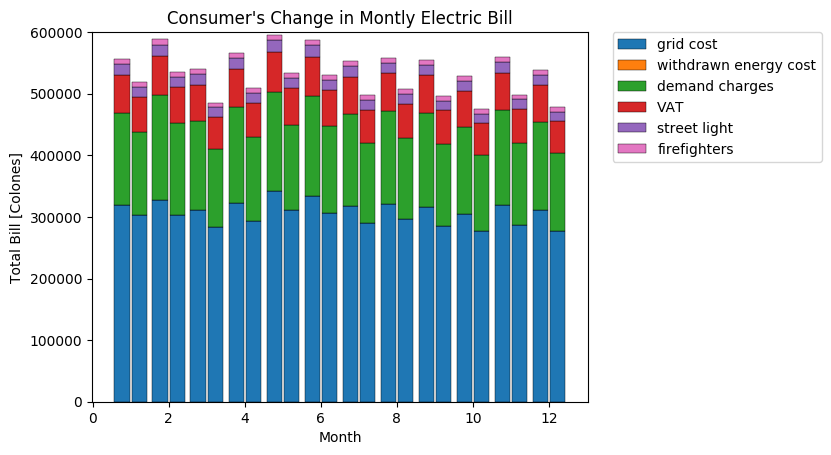

In [26]:
plot_bill(base_bills_commercial, bills_commercial, ["grid_cost", "withdrawn_energy_cost", "demand_charges", "VAT", "street_light", "firefighters"]);

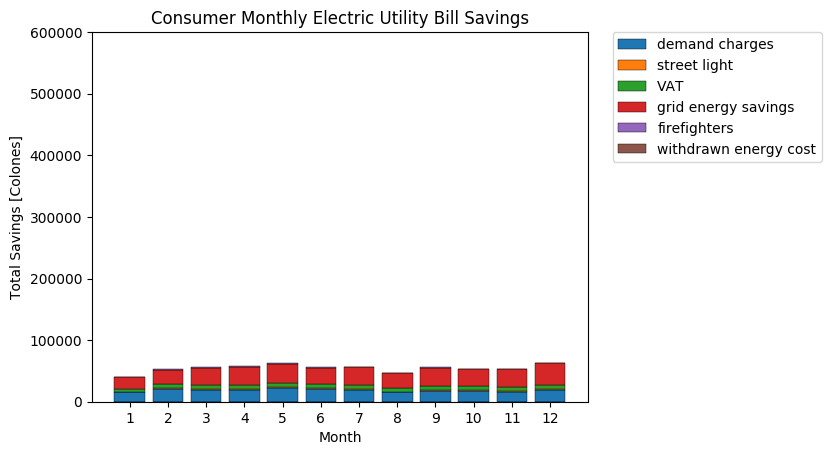

In [27]:
plot_savings(bills_commercial);

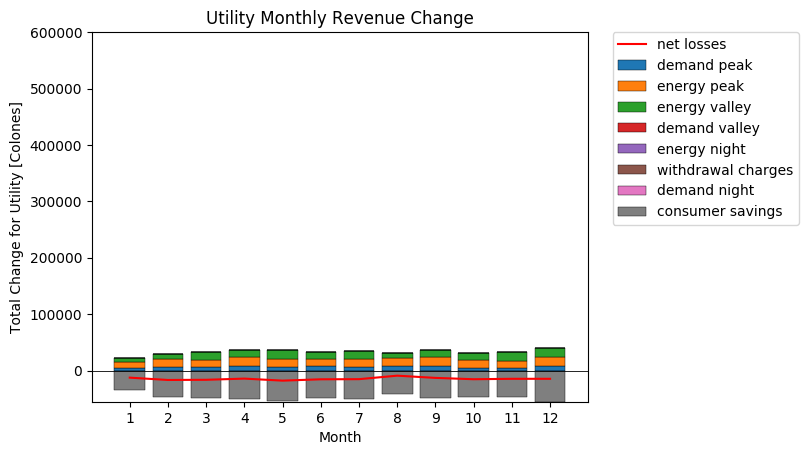

In [28]:
plot_utility_change(bills_commercial);

## Commercial case 2: medium PV system

In [29]:
PVComInd.capacity = 21.0
ts=simulate(cnfl_commercial, PVComInd, 3);

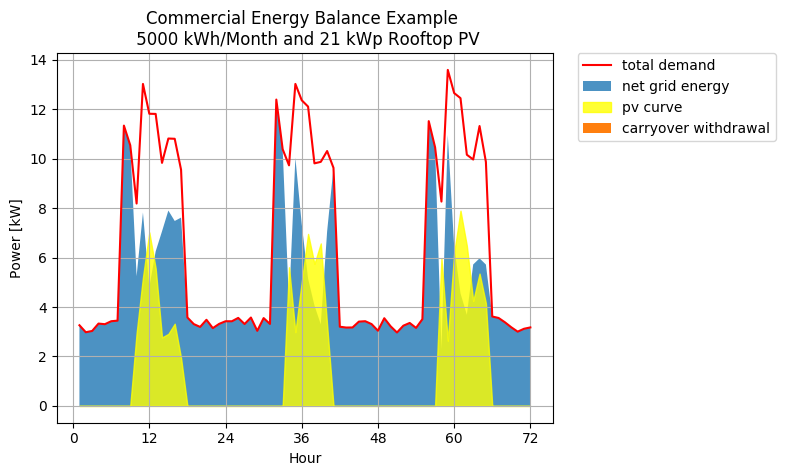

In [30]:
hours = 1:72
fill_between(hours, ts["injection_grid_h"], label = "net grid energy", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "pv curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "carryover withdrawal")
plot(hours, ts["demand_curve"], label = "total demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);
title("Commercial Energy Balance Example \n 5000 kWh/Month and 21 kWp Rooftop PV");

In [31]:
ebalance = annual_energy_balance(cnfl_commercial, PVComInd, print_output=true);

month consumer_energy PV_energy injection_grid grid_energy global_allowance allowance withdrawn_energy utility_supplied_energy carryover peak_power peak_demand
1 4969.4 744.44 0.0 4224.97 364.77 0.0 0.0 4224.97 0.0 14.71 12.9
2 5115.66 764.43 0.0 4351.23 739.35 0.0 0.0 4351.23 0.0 16.85 14.68
3 4857.78 732.46 0.0 4125.31 1098.25 0.0 0.0 4125.31 0.0 14.32 12.67
4 5002.92 731.51 0.0 4271.41 1456.69 0.0 0.0 4271.41 0.0 15.33 13.56
5 5389.4 1174.74 0.0 4214.66 2032.32 0.0 0.0 4214.66 0.0 15.94 13.92
6 5190.58 1109.46 0.0 4081.12 2575.95 0.0 0.0 4081.12 0.0 15.93 13.95
7 4977.0 982.26 0.0 3994.74 3057.26 0.0 0.0 3994.74 0.0 14.77 12.81
8 4987.09 651.06 0.0 4336.03 3376.28 0.0 0.0 4336.03 0.0 14.61 13.05
9 4916.18 989.44 0.0 3926.73 3861.11 0.0 0.0 3926.73 0.0 15.14 13.25
10 4753.59 1104.29 0.0 3649.3 4402.21 0.0 0.0 3649.3 0.0 13.97 12.4
11 4949.99 880.89 0.0 4069.1 4833.84 0.0 0.0 4069.1 0.0 15.24 13.32
12 4789.99 997.76 0.0 3792.23 5322.75 0.0 0.0 3792.23 0.0 14.37 12.55


In [32]:
bills_commercial = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "demand_cost", " ", "total_cost", " | ", 
        "counterfactual_energy_cost", " ", "counterfactual_demand_cost", " ", "counterfactual_cost", " ", " | ", "savings")
for m in 1:12
    bills_commercial[m] = monthly_bill(ebalance[m], cnfl_commercial, print_output=true)
end

grid_cost withdrawn_energy_cost demand_cost total_cost | counterfactual_energy_cost counterfactual_demand_cost counterfactual_cost  | savings
271327.38 0.0 129707.0 475016.59  | 319135.09 147889.36 553353.16  | 78336.57
279435.81 0.0 147626.16 505326.42  | 328527.76 169435.82 589369.18  | 84042.76
264927.67 0.0 127396.32 464671.63  | 311966.52 144010.31 540284.22  | 75612.58
274310.23 0.0 136277.63 486142.24  | 321287.54 154132.04 563104.22  | 76961.98
270665.38 0.0 139969.34 485996.79  | 346107.48 160256.21 599969.14  | 113972.35
262089.79 0.0 140242.1 476000.59  | 333339.33 160170.78 584521.8  | 108521.21
256542.29 0.0 128787.41 456187.38  | 319623.05 148450.65 554583.84  | 98396.46
278459.84 0.0 131245.69 485356.56  | 320271.0 146855.43 553532.27  | 68175.72
252174.67 0.0 133207.3 456008.63  | 315716.78 152168.09 554153.66  | 98145.02
234358.15 0.0 124632.3 424750.58  | 305275.44 140415.18 528115.08  | 103364.49
261317.8 0.0 133887.28 467780.38  | 317888.63 153219.79 557971.4  | 901

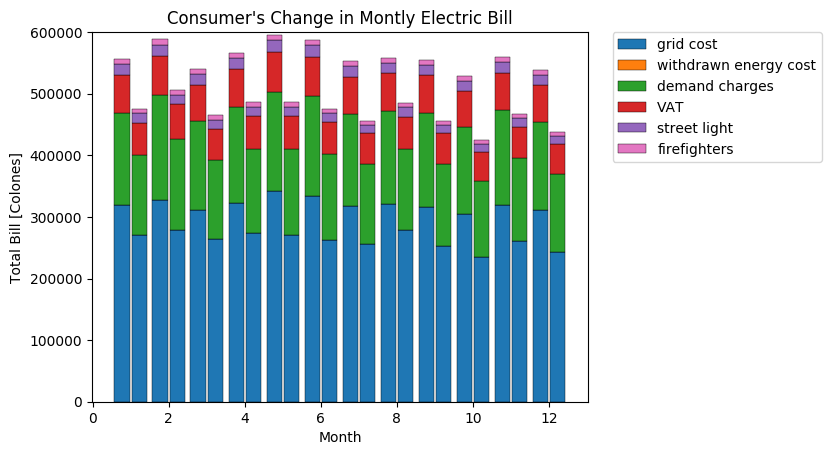

In [33]:
plot_bill(base_bills_commercial, bills_commercial, ["grid_cost", "withdrawn_energy_cost", "demand_charges", "VAT", "street_light", "firefighters"]);

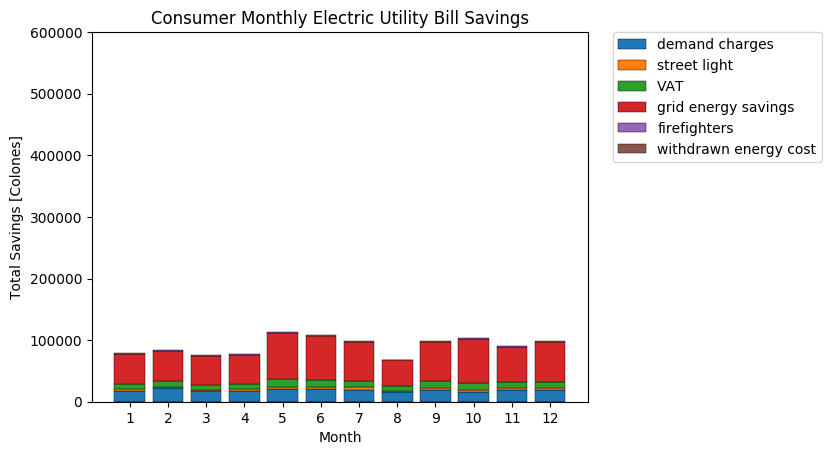

In [34]:
plot_savings(bills_commercial);

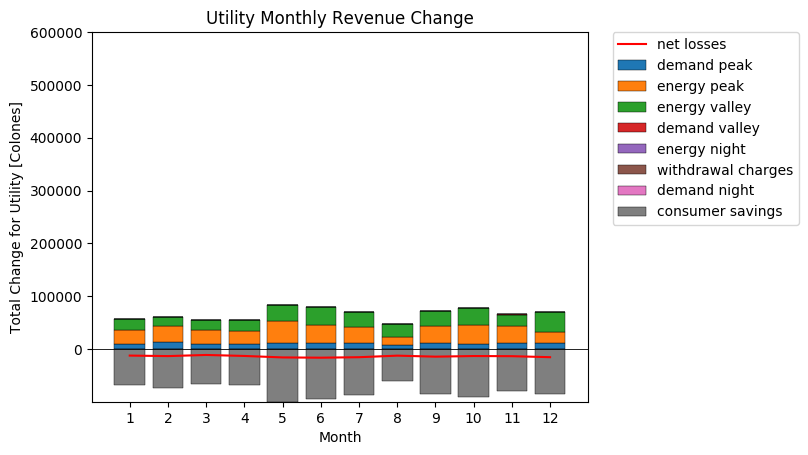

In [35]:
plot_utility_change(bills_commercial);

## Commercial case 3: Large PV system

In [36]:
PVComInd.capacity = 32.0
ts=simulate(cnfl_commercial, PVComInd, 3);

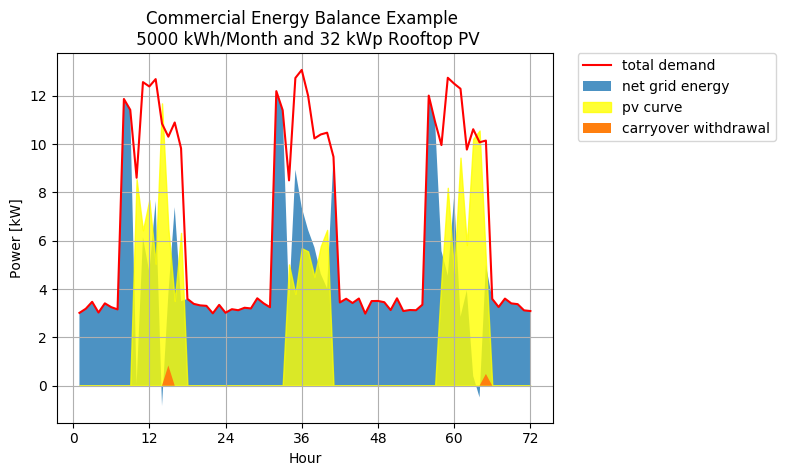

In [37]:
hours = 1:72
fill_between(hours, ts["injection_grid_h"], label = "net grid energy", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "pv curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "carryover withdrawal")
plot(hours, ts["demand_curve"], label = "total demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);
title("Commercial Energy Balance Example \n 5000 kWh/Month and 32 kWp Rooftop PV");

In [38]:
ebalance = annual_energy_balance(cnfl_commercial, PVComInd, print_output=true);

month consumer_energy PV_energy injection_grid grid_energy global_allowance allowance withdrawn_energy utility_supplied_energy carryover peak_power peak_demand
1 4997.21 1167.18 0.0 3830.03 571.92 0.0 0.0 3830.03 0.0 14.89 13.01
2 5112.41 1281.23 2.1 3833.28 1199.72 2.1 2.1 3831.18 0.0 16.84 14.59
3 4858.64 1028.34 0.0 3830.3 1701.51 0.0 0.0 3830.3 0.0 14.47 12.68
4 5013.61 1715.91 0.0 3297.7 2542.3 0.0 0.0 3297.7 0.0 15.44 13.55
5 5362.79 1327.8 21.21 4056.2 3192.92 21.21 21.21 4035.0 0.0 15.97 13.74
6 5184.51 1608.67 0.0 3575.84 3959.97 0.0 0.0 3575.84 0.0 15.98 13.9
7 4955.09 1388.12 0.0 3566.97 4640.14 0.0 0.0 3566.97 0.0 14.68 12.93
8 5014.41 1312.14 0.0 3702.28 5283.09 0.0 0.0 3702.28 0.0 14.93 13.07
9 4899.02 1653.74 37.47 3282.74 6093.42 37.47 37.47 3245.28 0.0 14.97 13.08
10 4754.05 1261.75 0.91 3493.2 6674.21 0.91 0.91 3492.29 0.0 14.15 12.42
11 4931.83 1665.03 0.0 3266.8 7489.17 0.0 0.0 3266.8 0.0 14.96 13.32
12 4830.29 1729.86 0.0 3100.42 8336.8 0.0 0.0 3100.42 0.0 14.44 12

In [39]:
bills_commercial = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "total_energy_cost", " ", "total_demand_charges", " | ", 
        "counterfactual_energy_cost", " ", "counterfactual_demand_cost", " ", "counterfactual_cost", " ", " | ", "savings")
for m in 1:12
    bills_commercial[m] = monthly_bill(ebalance[m], cnfl_commercial, print_output=true)
end

grid_cost withdrawn_energy_cost total_energy_cost total_demand_charges | counterfactual_energy_cost counterfactual_demand_cost counterfactual_cost  | savings
245964.58 0.0 130823.53 445807.77  | 320921.08 149708.07 557587.17  | 111779.4
246038.48 44.16 146671.39 464140.06  | 328318.81 169272.75 588930.87  | 124790.81
245982.05 0.0 127457.31 441966.03  | 312022.0 145457.75 542011.85  | 100045.82
211778.19 0.0 136194.35 410873.41  | 321973.9 155210.3 565166.64  | 154293.23
259127.5 445.96 138131.68 470603.92  | 344398.59 160599.0 598308.14  | 127704.21
229640.73 0.0 139700.17 436369.89  | 332949.52 160610.55 584557.83  | 148187.94
229071.08 0.0 129997.04 424550.75  | 318215.9 147631.64 551952.42  | 127401.67
237760.1 0.0 131351.15 436550.15  | 322025.49 150142.99 559413.92  | 122863.77
208411.69 787.92 131481.04 402453.48  | 314614.85 150541.37 550962.31  | 148508.83
224275.16 19.12 124829.96 412881.21  | 305304.98 142268.39 530277.15  | 117395.94
209793.75 0.0 133893.98 405848.13  | 316

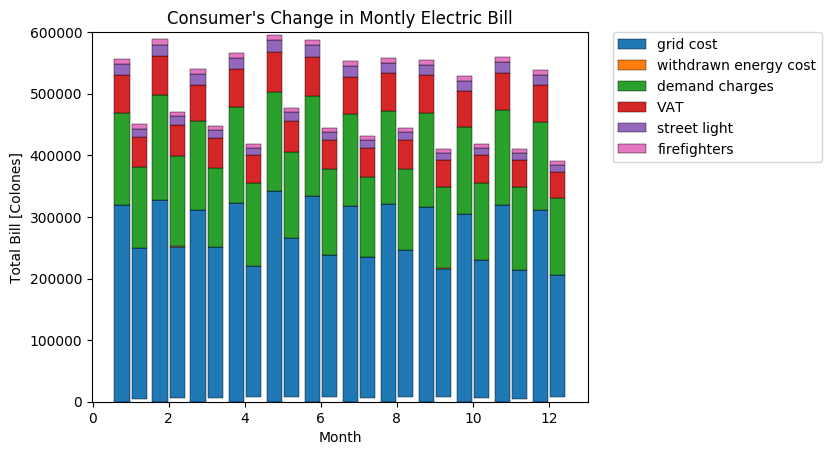

In [40]:
plot_bill(base_bills_commercial, bills_commercial, ["grid_cost", "withdrawn_energy_cost", "demand_charges", "VAT", "street_light", "firefighters"]);

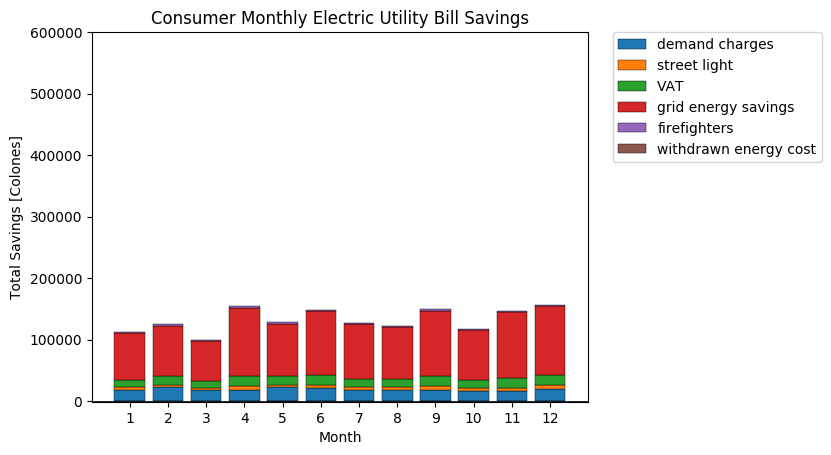

In [41]:
plot_savings(bills_commercial);

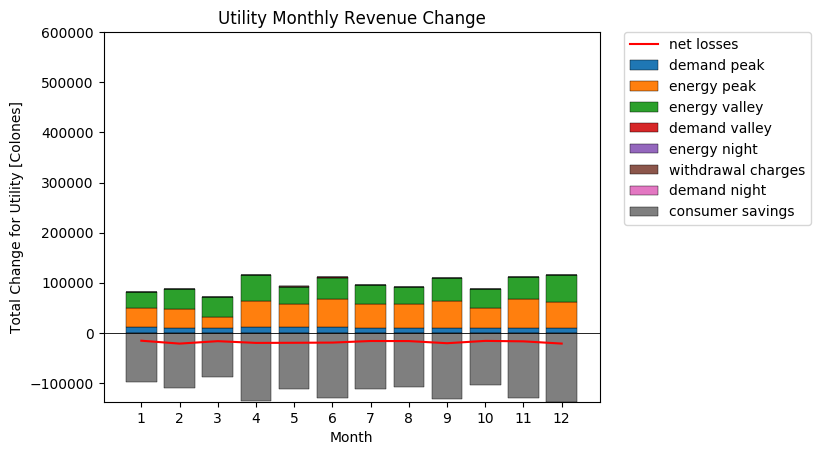

In [42]:
plot_utility_change(bills_commercial);

# Medium Voltage (TMT) cases, users are medium to large industrial consumers.

## TMT case 1: small PV system

In [43]:
PVTMT.capacity = 0.0
base_ebalance = annual_energy_balance(cnfl_mediumvoltage, PVTMT, print_output=false);
PVTMT.capacity = 30.0
ts=simulate(cnfl_mediumvoltage, PVTMT, 3);

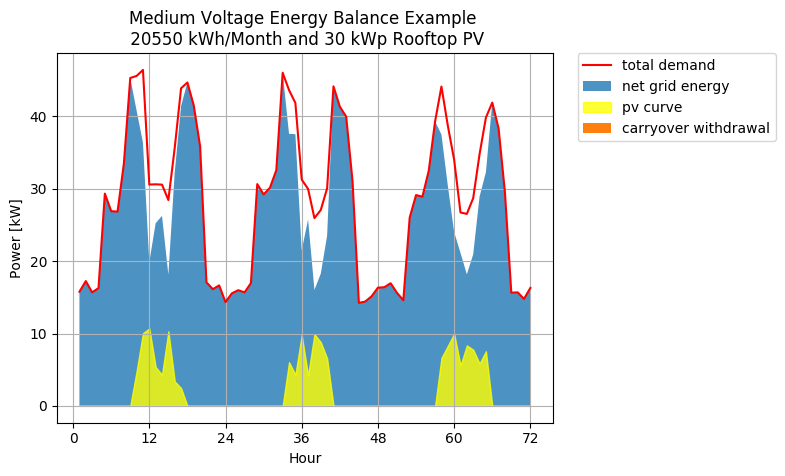

In [44]:
hours = 1:72
fill_between(hours, ts["injection_grid_h"], label = "net grid energy", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "pv curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "carryover withdrawal")
plot(hours, ts["demand_curve"], label = "total demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);
title("Medium Voltage Energy Balance Example \n 20550 kWh/Month and 30 kWp Rooftop PV");

In [45]:
ebalance = annual_energy_balance(cnfl_mediumvoltage, PVTMT, print_output=true);

month | consumer_energy_peak consumer_energy_valley consumer_energy_night  | PV_energy total_injection global_allowance withdrawn_energy  | grid_energy_peak grid_energy_valley grid_energy_night  | global_generation global_withdrawal carry_over  | peak_power_peak peak_power_valley peak_power_night  | peak_demand_peak peak_demand_valley peak_demand_night  | 
1 | 7597.88 7741.03 5772.91  | 1084.38 0.0 531.34 0.0  | 6943.47 7311.06 5772.91  | 1084.38 0.0 0.0  | 46.46 46.37 35.79  | 46.41 39.16 35.79 
2 | 6964.57 7061.86 5309.31  | 947.05 0.0 995.4 0.0  | 6537.79 6541.58 5309.31  | 2031.43 0.0 0.0  | 47.28 46.19 36.36  | 47.28 43.96 36.36 
3 | 7535.03 7718.27 5779.7  | 1195.36 0.0 1581.12 0.0  | 6819.25 7238.69 5779.7  | 3226.78 0.0 0.0  | 46.62 46.54 35.5  | 46.62 42.27 35.5 
4 | 7865.09 8024.01 5995.74  | 1502.9 0.0 2317.54 0.0  | 7287.29 7098.9 5995.74  | 4729.68 0.0 0.0  | 49.79 49.8 38.17  | 49.79 45.09 38.17 
5 | 7642.54 7678.33 5771.96  | 1512.31 0.0 3058.57 0.0  | 6841.02 6967.54 57

In [46]:
bills_TMT= Dict(); base_bills_TMT= Dict()
println("grid_energy_cost_peak", " ",    
        "grid_energy_cost_valley", " ",
        "grid_energy_cost_night", " ", 
        " | ",
        "withdrawn_energy_cost", " ",       
        " | ",      
        "counterfactual_energy_cost_peak", " ",
        "counterfactual_energy_cost_valley"," ",
        "counterfactual_energy_cost_night"," ",        
         " | ",
        "grid_demand_cost_peak", " ",    
        "grid_demand_cost_valley", " ",
        "grid_demand_cost_night", " ", 
        " | ",  
        "counterfactual_demand_cost_peak", " ",
        "counterfactual_demand_cost_valley"," ",
        "counterfactual_demand_cost_night"," ",        
         " | ",
        "total_savings")
for m in 1:12
    bills_TMT[m] = monthly_bill(ebalance[m], cnfl_mediumvoltage, print_output=true)
    base_bills_TMT[m] = monthly_bill(base_ebalance[m], cnfl_mediumvoltage, print_output=true)
end

grid_energy_cost_peak grid_energy_cost_valley grid_energy_cost_night  | withdrawn_energy_cost  | counterfactual_energy_cost_peak counterfactual_energy_cost_valley counterfactual_energy_cost_night  | grid_demand_cost_peak grid_demand_cost_valley grid_demand_cost_night  | counterfactual_demand_cost_peak counterfactual_demand_cost_valley counterfactual_demand_cost_night  | total_savings
377863.82 198934.03 113091.36  | 0.0  | 413476.68 210633.48 113091.36  | 442878.21 265874.78 154271.05  | 443362.76 314868.41 154271.05  | 114873.25 
412859.26 209809.78 113104.57  | 0.0  | 412859.26 209809.78 113104.57  | 444567.48 314848.38 154707.65  | 444567.48 314848.38 154707.65  | 0.0 
355786.5 177996.5 104009.41  | 0.0  | 379011.85 192153.08 104009.41  | 451151.85 298498.53 156746.93  | 451151.85 313623.48 156746.93  | 63575.79 
377405.48 194494.05 103856.76  | 0.0  | 377405.48 194494.05 103856.76  | 451977.87 318280.9 157045.59  | 451977.87 318280.9 157045.59  | 0.0 
371103.8 196964.87 113224.24  

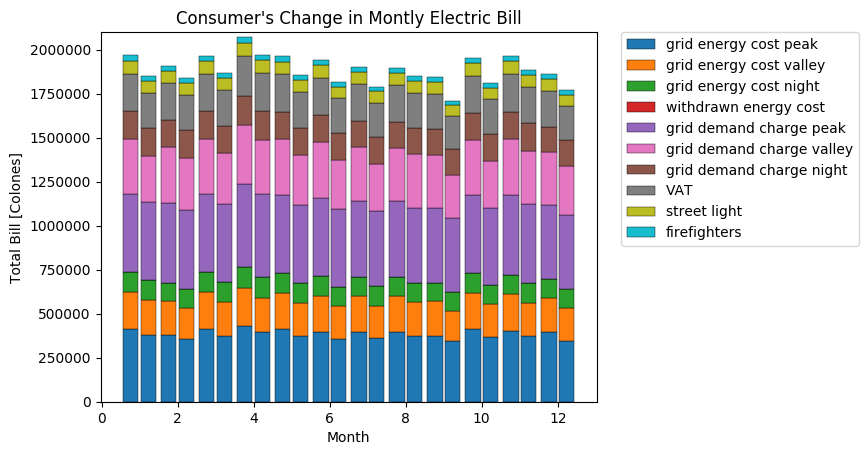

In [47]:
fields = ["grid_energy_cost_peak", 
        "grid_energy_cost_valley",
        "grid_energy_cost_night", 
        "withdrawn_energy_cost",      
        "grid_demand_charge_peak",    
        "grid_demand_charge_valley", 
        "grid_demand_charge_night",
        "VAT", "street_light", "firefighters"]
plot_bill(base_bills_TMT, bills_TMT, fields, 2);

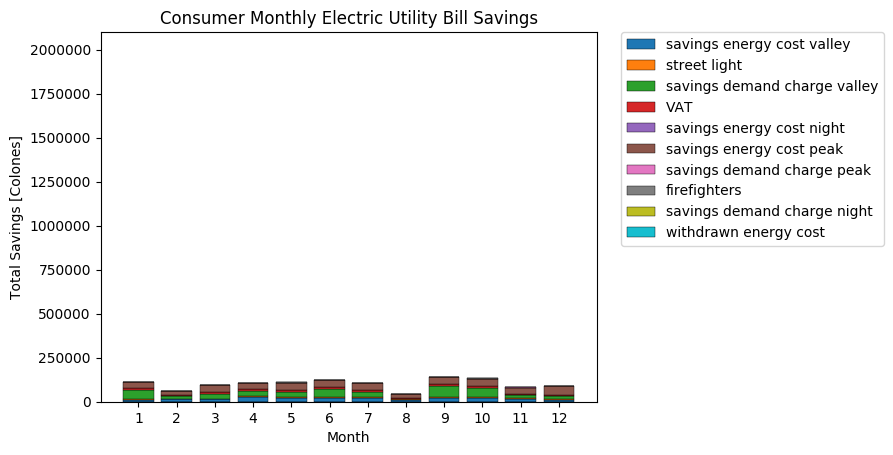

In [48]:
plot_savings(bills_TMT, 2);

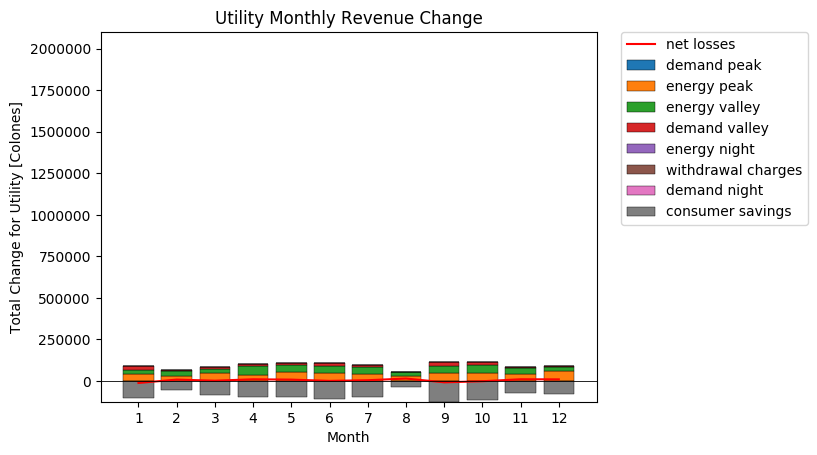

In [49]:
plot_utility_change(bills_TMT,2);

## TMT Case2: Medium PV System

In [67]:
PVTMT.capacity = 75
ts=simulate(cnfl_mediumvoltage, PVTMT, 3);

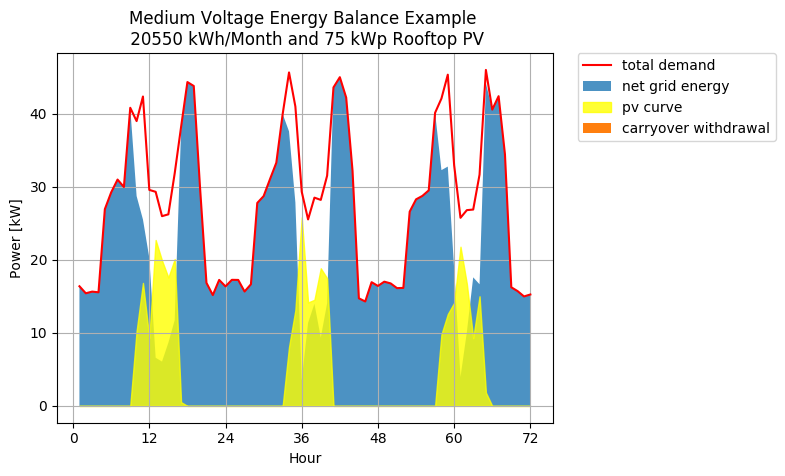

In [68]:
hours = 1:72
fill_between(hours, ts["injection_grid_h"], label = "net grid energy", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "pv curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "carryover withdrawal")
plot(hours, ts["demand_curve"], label = "total demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);
title("Medium Voltage Energy Balance Example \n 20550 kWh/Month and 75 kWp Rooftop PV");

In [69]:
ebalance = annual_energy_balance(cnfl_mediumvoltage, PVTMT, print_output=true);

month | consumer_energy_peak consumer_energy_valley consumer_energy_night  | PV_energy total_injection global_allowance withdrawn_energy  | grid_energy_peak grid_energy_valley grid_energy_night  | global_generation global_withdrawal carry_over  | peak_power_peak peak_power_valley peak_power_night  | peak_demand_peak peak_demand_valley peak_demand_night  | 
1 | 7628.67 7688.45 5830.51  | 3163.57 0.0 1550.15 0.0  | 5669.17 6484.39 5830.51  | 3163.57 0.0 0.0  | 46.56 46.31 35.84  | 46.56 35.72 35.84 
2 | 6924.79 7060.81 5297.33  | 2712.22 0.0 2879.14 0.0  | 5346.16 5927.23 5297.33  | 5875.79 0.0 0.0  | 47.3 47.05 36.21  | 47.12 38.38 36.21 
3 | 7553.52 7740.25 5795.33  | 3134.11 0.0 4414.85 0.0  | 5919.24 6240.43 5795.33  | 9009.9 0.0 0.0  | 46.61 46.3 35.8  | 46.58 42.03 35.8 
4 | 7893.49 8054.08 6010.0  | 3600.91 0.0 6179.3 0.0  | 5951.18 6395.48 6010.0  | 12610.81 0.0 0.0  | 49.84 49.65 38.42  | 49.82 38.21 38.42 
5 | 7577.23 7747.03 5793.35  | 3168.97 0.0 7732.09 0.0  | 5517.38 6637.9

In [70]:
bills_TMT= Dict()
println("grid_energy_cost_peak", " ",    
        "grid_energy_cost_valley", " ",
        "grid_energy_cost_night", " ", 
        " | ",
        "withdrawn_energy_cost", " ",       
        " | ",      
        "counterfactual_energy_cost_peak", " ",
        "counterfactual_energy_cost_valley"," ",
        "counterfactual_energy_cost_night"," ",        
         " | ",
        "grid_demand_cost_peak", " ",    
        "grid_demand_cost_valley", " ",
        "grid_demand_cost_night", " ", 
        " | ",  
        "counterfactual_demand_cost_peak", " ",
        "counterfactual_demand_cost_valley"," ",
        "counterfactual_demand_cost_night"," ",        
         " | ",
        "total_savings")
for m in 1:12
    bills_TMT[m] = monthly_bill(ebalance[m], cnfl_mediumvoltage, print_output=true)
end

grid_energy_cost_peak grid_energy_cost_valley grid_energy_cost_night  | withdrawn_energy_cost  | counterfactual_energy_cost_peak counterfactual_energy_cost_valley counterfactual_energy_cost_night  | grid_demand_cost_peak grid_demand_cost_valley grid_demand_cost_night  | counterfactual_demand_cost_peak counterfactual_demand_cost_valley counterfactual_demand_cost_night  | total_savings
308516.01 176440.15 114219.74  | 0.0  | 415152.4 209202.67 114219.74  | 444320.19 242550.97 154483.06  | 444320.19 314463.77 154483.06  | 253584.31 
290937.83 161279.79 103774.77  | 0.0  | 376847.26 192124.65 103774.77  | 449687.85 260600.87 156060.47  | 451408.3 319446.69 156060.47  | 212995.24 
322125.03 169802.04 113530.54  | 0.0  | 411062.7 210612.34 113530.54  | 444509.14 285410.46 154313.26  | 444755.08 314365.88 154313.26  | 193395.07 
323863.13 174021.07 117735.88  | 0.0  | 429563.79 219151.47 117735.88  | 475401.44 259457.55 165616.74  | 475657.09 337150.38 165616.74  | 275163.71 
300256.08 180617

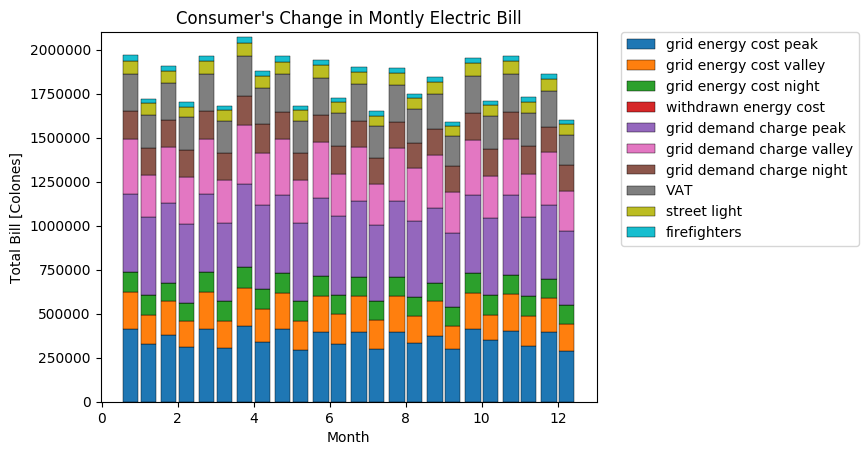

In [54]:
fields = ["grid_energy_cost_peak", 
        "grid_energy_cost_valley",
        "grid_energy_cost_night", 
        "withdrawn_energy_cost",      
        "grid_demand_charge_peak",    
        "grid_demand_charge_valley", 
        "grid_demand_charge_night",
        "VAT", "street_light", "firefighters"]
plot_bill(base_bills_TMT, bills_TMT, fields,2);

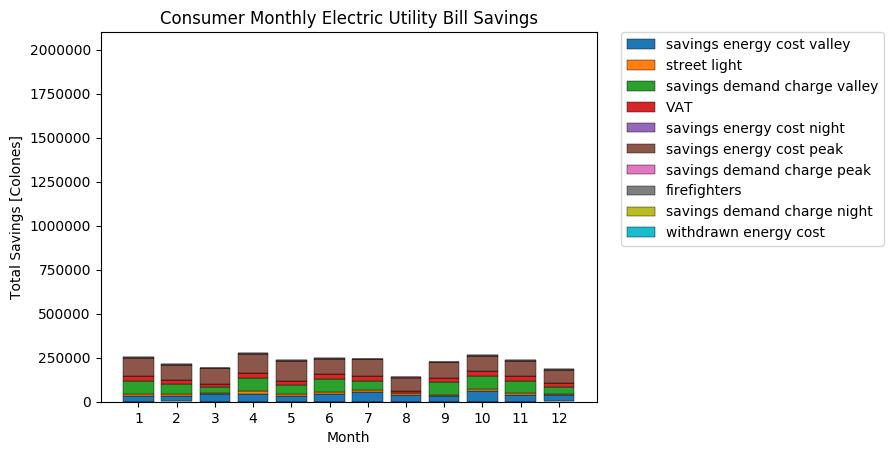

In [71]:
plot_savings(bills_TMT,2);

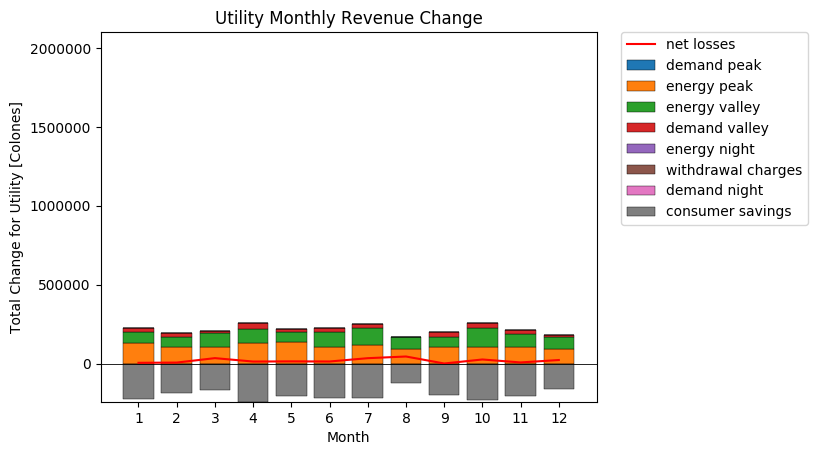

In [72]:
plot_utility_change(bills_TMT,2);

## TMT Case 3: Large PV System

In [57]:
PVTMT.capacity = 150
ts=simulate(cnfl_mediumvoltage, PVTMT, 3);

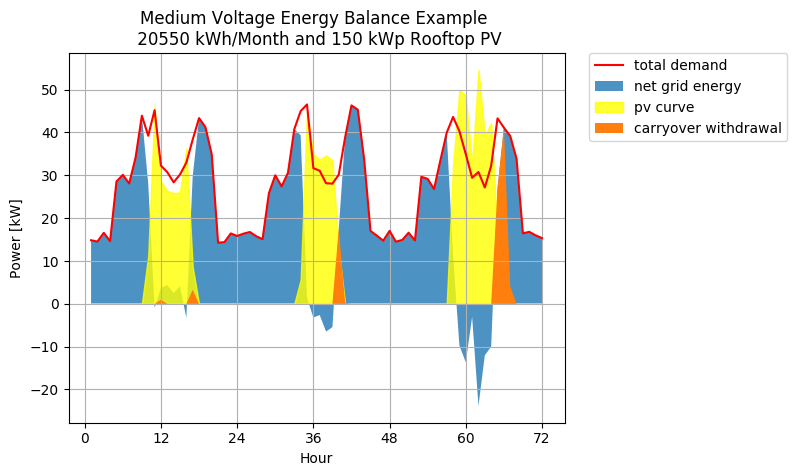

PyObject Text(0.5, 1, 'Medium Voltage Energy Balance Example \n 20550 kWh/Month and 150 kWp Rooftop PV')

In [58]:
hours = 1:72
fill_between(hours, ts["injection_grid_h"], label = "net grid energy", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "pv curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "carryover withdrawal")
plot(hours, ts["demand_curve"], label = "total demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);
title("Medium Voltage Energy Balance Example \n 20550 kWh/Month and 150 kWp Rooftop PV")

In [59]:
ebalance = annual_energy_balance(cnfl_mediumvoltage, PVTMT, print_output=true);

month | consumer_energy_peak consumer_energy_valley consumer_energy_night  | PV_energy total_injection global_allowance withdrawn_energy  | grid_energy_peak grid_energy_valley grid_energy_night  | global_generation global_withdrawal carry_over  | peak_power_peak peak_power_valley peak_power_night  | peak_demand_peak peak_demand_valley peak_demand_night  | 
1 | 7597.98 7684.18 5787.99  | 6529.36 1145.0 3199.39 1145.0  | 4393.98 5503.82 5787.99  | 6529.36 1145.0 0.0  | 46.58 46.51 35.39  | 46.53 35.59 35.39 
2 | 6969.61 7077.97 5274.38  | 5306.82 972.93 4654.72 972.93  | 4651.44 5062.26 5274.38  | 11836.17 2117.93 0.0  | 47.38 47.31 36.4  | 46.98 42.7 36.4 
3 | 7574.08 7703.2 5779.08  | 6569.93 99.38 6901.06 99.38  | 4407.05 4399.68 5779.08  | 18406.11 2217.32 0.0  | 46.41 46.6 35.91  | 46.41 35.66 35.91 
4 | 7869.77 7933.87 5985.88  | 7798.61 1239.0 10622.99 1239.0  | 4778.21 4465.83 5985.88  | 26204.71 3456.32 0.0  | 49.85 49.32 38.31  | 49.84 37.92 38.31 
5 | 7589.73 7695.71 5746.46  

In [60]:
bills_TMT= Dict()
println("grid_energy_cost_peak", " ",    
        "grid_energy_cost_valley", " ",
        "grid_energy_cost_night", " ", 
        " | ",
        "withdrawn_energy_cost", " ",       
        " | ",      
        "counterfactual_energy_cost_peak", " ",
        "counterfactual_energy_cost_valley"," ",
        "counterfactual_energy_cost_night"," ",        
         " | ",
        "grid_demand_cost_peak", " ",    
        "grid_demand_cost_valley", " ",
        "grid_demand_cost_night", " ", 
        " | ",  
        "counterfactual_demand_cost_peak", " ",
        "counterfactual_demand_cost_valley"," ",
        "counterfactual_demand_cost_night"," ",        
         " | ",
        "savings")
for m in 1:12
    bills_TMT[m] = monthly_bill(ebalance[m], cnfl_mediumvoltage, print_output=true)
end

grid_energy_cost_peak grid_energy_cost_valley grid_energy_cost_night  | withdrawn_energy_cost  | counterfactual_energy_cost_peak counterfactual_energy_cost_valley counterfactual_energy_cost_night  | grid_demand_cost_peak grid_demand_cost_valley grid_demand_cost_night  | counterfactual_demand_cost_peak counterfactual_demand_cost_valley counterfactual_demand_cost_night  | savings
203006.39 136660.34 113386.67  | 24079.36  | 413481.83 209086.46 113386.67  | 443995.71 241673.87 152566.55  | 444504.36 315790.79 152566.55  | 401530.4 
245653.83 115009.29 103325.03  | 20460.78  | 379286.36 192591.48 103325.03  | 448295.68 289947.28 156909.15  | 452128.42 321263.82 156909.15  | 274435.88 
239564.48 117144.67 113212.24  | 2090.01  | 412181.58 209603.99 113212.24  | 442917.97 242111.44 154777.29  | 442917.97 316424.16 154777.29  | 409762.38 
234531.92 100551.09 117263.34  | 26056.22  | 428273.14 215880.58 117263.34  | 475573.82 257480.15 165150.06  | 475698.1 334864.66 165150.06  | 436724.66 
25

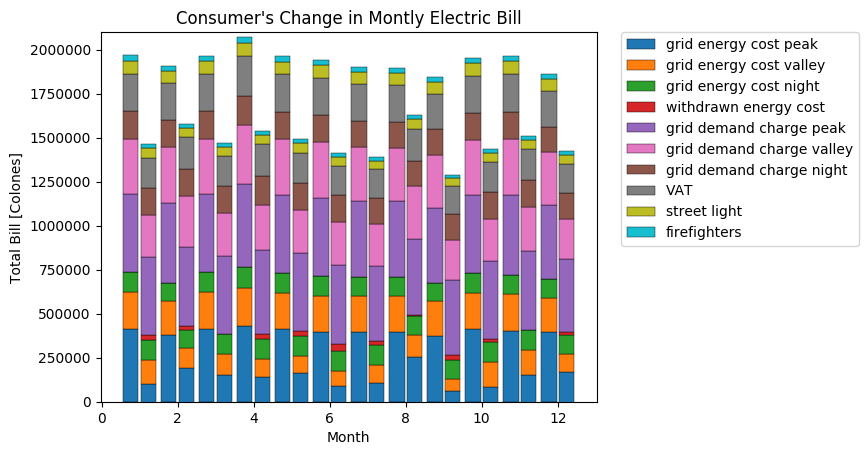

In [61]:
fields = ["grid_energy_cost_peak", 
        "grid_energy_cost_valley",
        "grid_energy_cost_night", 
        "withdrawn_energy_cost",      
        "grid_demand_charge_peak",    
        "grid_demand_charge_valley", 
        "grid_demand_charge_night",
        "VAT", "street_light", "firefighters"]
plot_bill(base_bills_TMT, bills_TMT, fields,2);

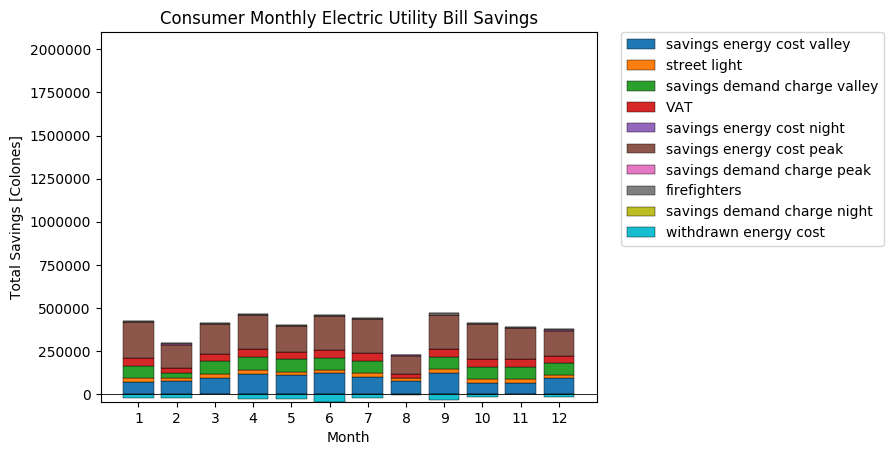

In [62]:
plot_savings(bills_TMT,2);

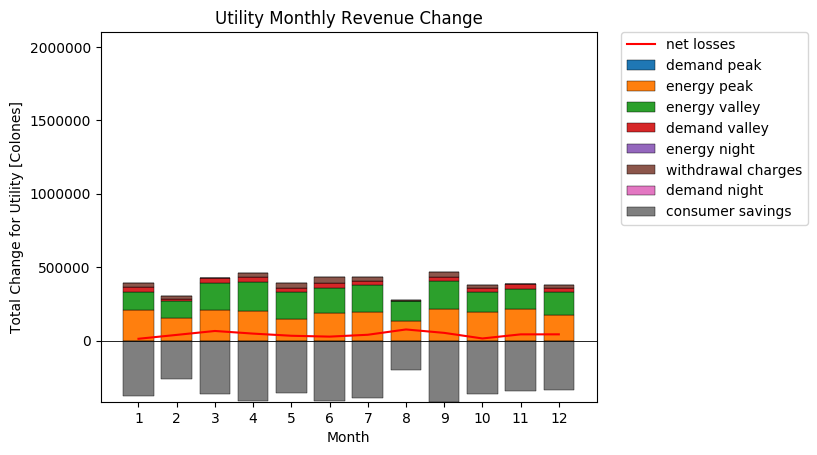

In [66]:
plot_utility_change(bills_TMT,2);